In [16]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/SQuAD/squad

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/SQuAD/squad


# Data loading and package installation

In [ ]:
# !git clone https://github.com/minggg/squad.git

Cloning into 'squad'...
remote: Enumerating objects: 44, done.
remote: Total 44 (delta 0), reused 0 (delta 0), pack-reused 44
Unpacking objects: 100% (44/44), done.


In [ ]:
# !pip install spacy
# !pip install ujson

     |████████████████████████████████| 184kB 8.0MB/s 


In [ ]:
# !python setup.py

glove.840B.300d.zip: 2.18GB [06:51, 5.29MB/s]                
Unzipping GloVe word vectors...
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
Pre-processing train examples...
100% 442/442 [01:25<00:00,  5.14it/s]
130319 questions in total
Pre-processing word vectors...
2196018it [03:54, 9379.99it/s]                  
88747 / 107430 tokens have corresponding word embedding vector
Pre-processing char vectors...
1374 tokens have corresponding char embedding vector
Pre-processing dev examples...
100% 16/16 [00:02<00:00,  6.46it/s]
6078 questions in total
Converting train examples to indices...
130319it [00:49, 2641.88it/s]
tcmalloc: large alloc 3326009344 bytes == 0x557b7d744000 @  0x7fb748dad1e7 0x7fb7468ad46e 0x7fb7468fdc7b 0x7fb746900e83 0x7fb74690107b 0x7fb74

# read  CS224 squad data json files 

The dev + test set here = full development set in official SQuAD data 

In [2]:
import os, json
import pandas as pd

path_to_json = '/content/drive/My Drive/SQuAD/squad/data/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['dev-v2.0.json', 'test-v2.0.json', 'train-v2.0.json', 'test_eval.json', 'test_meta.json', 'word_emb.json', 'char_emb.json', 'train_eval.json', 'dev_eval.json', 'word2idx.json', 'char2idx.json', 'dev_meta.json']


In [ ]:
# # we need both the json and an index number so use enumerate()
# for index, js in enumerate(json_files):
#     with open(os.path.join(path_to_json, js)) as json_file:
#         json_text = json.load(json_file)

In [ ]:
# dev = pd.DataFrame.from_dict(many_jsons[0])
# test = pd.DataFrame.from_dict(many_jsons[1])
# train = pd.DataFrame.from_dict(many_jsons[2])
# test_eval = pd.DataFrame.from_dict(many_jsons[3])
# test_meta = pd.DataFrame.from_dict(many_jsons[4])
# word_emb = pd.DataFrame.from_dict(many_jsons[5])
# char_emb= pd.DataFrame.from_dict(many_jsons[6])
# train_eval= pd.DataFrame.from_dict(many_jsons[7])
# dev_eval= pd.DataFrame.from_dict(many_jsons[8])
# word2idx= pd.DataFrame.from_dict(many_jsons[9])
# char2idx= pd.DataFrame.from_dict(many_jsons[10])
# dev_meta= pd.DataFrame.from_dict(many_jsons[11])
# print montreal_json['features'][0]['geometry']

In [3]:
# load train
import json 
  
# Opening JSON file 
f = open('/content/drive/My Drive/SQuAD/squad/data/train-v2.0.json',) 
  
# returns JSON object as  
# a dictionary 
train = json.load(f) 
  
# Closing file 
f.close() 

In [4]:
# load dev
    
import json 
  
# Opening JSON file 
f = open('/content/drive/My Drive/SQuAD/squad/data/dev-v2.0.json',) 
  
# returns JSON object as  
# a dictionary 
dev = json.load(f) 
  
# Closing file 
f.close() 

In [5]:
# load dev_meta 
    
import json 
  
# Opening JSON file 
f = open('/content/drive/My Drive/SQuAD/squad/data/dev_meta.json',) 
  
# returns JSON object as  
# a dictionary 
dev_meta = json.load(f) 
  
# Closing file 
f.close() 

In [6]:
# load dev_eval 
    
import json 
  
# Opening JSON file 
f = open('/content/drive/My Drive/SQuAD/squad/data/dev_eval.json',) 
  
# returns JSON object as  
# a dictionary 
dev_eval = json.load(f) 
  
# Closing file 
f.close() 

In [ ]:
# import pandas as pd
# train_df = pd.read_json (r'/content/drive/My Drive/SQuAD/squad/data/train-v2.0.json')

In [ ]:
pd.options.display.max_rows = 10
# train_df

In [7]:
print(train.keys(),dev.keys(),dev_meta.keys(),dev_eval.keys()) 

dict_keys(['version', 'data']) dict_keys(['version', 'data']) dict_keys(['total']) dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145',

## examine json dictionaries

In [8]:
type(train)

dict

In [9]:
type(train['data'])

list

In [12]:
type(train['data'][0])

dict

In [15]:
len(train['data'])*0.05

22.1

In [20]:
type(train['data'][0]['paragraphs'])

list

In [11]:
train['data'][1]

{'paragraphs': [{'context': 'Frédéric François Chopin (/ˈʃoʊpæn/; French pronunciation: \u200b[fʁe.de.ʁik fʁɑ̃.swa ʃɔ.pɛ̃]; 22 February or 1 March 1810 – 17 October 1849), born Fryderyk Franciszek Chopin,[n 1] was a Polish and French (by citizenship and birth of father) composer and a virtuoso pianist of the Romantic era, who wrote primarily for the solo piano. He gained and has maintained renown worldwide as one of the leading musicians of his era, whose "poetic genius was based on a professional technique that was without equal in his generation." Chopin was born in what was then the Duchy of Warsaw, and grew up in Warsaw, which after 1815 became part of Congress Poland. A child prodigy, he completed his musical education and composed his earlier works in Warsaw before leaving Poland at the age of 20, less than a month before the outbreak of the November 1830 Uprising.',
   'qas': [{'answers': [{'answer_start': 182, 'text': 'Polish and French'}],
     'id': '56cbd2356d243a140015ed66'

In [ ]:
dev_meta

{'total': 5951}

In [ ]:
# eval_examples[str(total)] = {"context": context,
#                                                  "question": ques,
#                                                  "spans": spans,
#                                                  "answers": answer_texts,
#                                                  "uuid": qa["id"]}

dev_eval['1']

{'answers': ['France', 'France', 'France', 'France'],
 'context': 'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.',
 'question': 'In what country is Normandy located?',
 'spans': [[0, 3],
  [4, 11],
  [12, 13],
  [13, 19],
  [19, 20],
  [21, 30],
  [30, 31],
  [32, 38],
  [38, 39],
  [40, 48],
  [48, 49

In [ ]:
dev['data'][0]['paragraphs'][0]

{'context': 'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.',
 'qas': [{'answers': [{'answer_start': 159, 'text': 'France'},
    {'answer_start': 159, 'text': 'France'},
    {'answer_start': 159, 'text': 'France'},
    {'answer_start': 159, 'text': 'France'}],
   'id': '68cf05f67fd29c6f129fe2fb9',
   'i

In [ ]:
train['data'][0]['paragraphs'][0]['qas']

[{'answers': [{'answer_start': 269, 'text': 'in the late 1990s'}],
  'id': '56be85543aeaaa14008c9063',
  'is_impossible': False,
  'question': 'When did Beyonce start becoming popular?'},
 {'answers': [{'answer_start': 207, 'text': 'singing and dancing'}],
  'id': '56be85543aeaaa14008c9065',
  'is_impossible': False,
  'question': 'What areas did Beyonce compete in when she was growing up?'},
 {'answers': [{'answer_start': 526, 'text': '2003'}],
  'id': '56be85543aeaaa14008c9066',
  'is_impossible': False,
  'question': "When did Beyonce leave Destiny's Child and become a solo singer?"},
 {'answers': [{'answer_start': 166, 'text': 'Houston, Texas'}],
  'id': '56bf6b0f3aeaaa14008c9601',
  'is_impossible': False,
  'question': 'In what city and state did Beyonce  grow up? '},
 {'answers': [{'answer_start': 276, 'text': 'late 1990s'}],
  'id': '56bf6b0f3aeaaa14008c9602',
  'is_impossible': False,
  'question': 'In which decade did Beyonce become famous?'},
 {'answers': [{'answer_start': 3

In [ ]:
import pprint
i=0
j = 0
total_qa = 0
total_context = 0

for article in train['data']:
    if i < 1:
        pprint.pprint(article) # pretty print 1 article 
        i+=1
    for paragraph in article['paragraphs']:
        if j < 1:
            pprint.pprint(paragraph) # pretty print 1 paragraph/context in that article with many questions
            j+=1
            print(len(paragraph['context'])) # inside 'context', there is only one word string, so length of 'context' returns the character length of the string
            print(len(paragraph['qas'])) # inside 'qas', there are multiple questions, so length returns the number of questions
        
        total_qa += len(paragraph['qas'])
        total_context += len(paragraph['context']) 
        

Streaming output truncated to the last 5000 lines.
                                      "included in which film's soundtrack?"},
                         {'answers': [{'answer_start': 330,
                                       'text': 'No, No, No'}],
                          'id': '56d45fcb2ccc5a1400d830fb',
                          'is_impossible': False,
                          'question': "What was Destiny's Child's first major "
                                      'song hit?'},
                         {'answers': [{'answer_start': 688, 'text': '1999'}],
                          'id': '56d45fcb2ccc5a1400d830fc',
                          'is_impossible': False,
                          'question': "When did Destiny's Child release their "
                                      'second album?'},
                         {'answers': [{'answer_start': 1212,
                                       'text': 'Marc Nelson'}],
                          'id': '56d45fcb2ccc5a1400d830f

## basic stats abt train data

In [ ]:
print("total number of questions =",total_qa)
print('total number of characters of contexts =',total_context)
print('total number of articles',len(train['data']))

total number of questions = 130319
total number of characters of contexts = 14001154
total number of articles 442


In [ ]:
import pprint
i = 0
j = 0

for article in train['data']:
    i+=1
    for paragraph in article['paragraphs']:
        j+=1
print("total number of articles =",i)
print("total number of contexts / paragraphs =",j)

total number of articles = 442
total number of contexts / paragraphs = 19035


# data preprocessing

## !Create a subset of data 5%

In [37]:
type(train['data'][0]['paragraphs'])

list

In [40]:
int(round(len(train['data'][0]['paragraphs'])*0.05,0))

3

In [48]:
import random 
random.seed(1)
context_sample = random.sample(train['data'][0]['paragraphs'],int(round(len(train['data'][0]['paragraphs'])*0.05,0)))
# context_sample

In [54]:
count_para = 0
para_context = []
train_05 = {'version':train['version'],'data':[]}
for paragraph in train['data']:
  count_para +=1
  para_context.append(len(paragraph['paragraphs']))
  context_sample = random.sample(paragraph['paragraphs'],int(round(len(paragraph['paragraphs'])*0.05,0)))
  new_paragraph = {'paragraphs':context_sample}
  train_05['data'].append(new_paragraph)
print(sum(para_context))

19035


In [56]:
# train_05

In [76]:
count_para_05 = 0
para_context_05 = []
for paragraph in train_05['data']:
  count_para_05 +=1
  para_context_05.append(len(paragraph['paragraphs']))
print(sum(para_context_05),"contexts, which is",sum(para_context_05)/sum(para_context),'of original data')

942 contexts, which is 0.049487785657998426 of original data


In [62]:
import json
with open("/content/drive/My Drive/SQuAD/train_05.json", "w") as write_file:
    json.dump(train_05, write_file)

In [63]:
# load train
import json 
  
# Opening JSON file 
f = open('/content/drive/My Drive/SQuAD/squad/train_05.json',) 
  
# returns JSON object as  
# a dictionary 
train_05_load = json.load(f) 
  
# Closing file 
f.close() 

In [71]:
# train_05_load['data'][0]['paragraphs'][2]

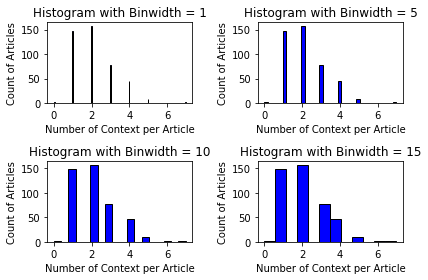

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(para_context_05, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth)
    ax.set_xlabel('Number of Context per Article')
    ax.set_ylabel('Count of Articles')

plt.tight_layout()
plt.show()

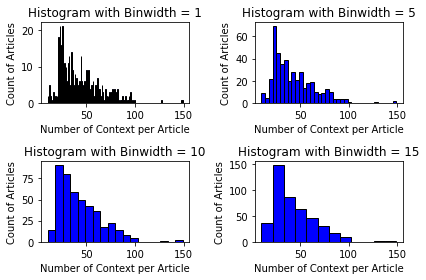

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(para_context, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth)
    ax.set_xlabel('Number of Context per Article')
    ax.set_ylabel('Count of Articles')

plt.tight_layout()
plt.show()

## !Create a subset of data 10%

In [73]:
count_para = 0
para_context = []
train_10 = {'version':train['version'],'data':[]}
for paragraph in train['data']:
  count_para +=1
  para_context.append(len(paragraph['paragraphs']))
  context_sample = random.sample(paragraph['paragraphs'],int(round(len(paragraph['paragraphs'])*0.1,0)))
  new_paragraph = {'paragraphs':context_sample}
  train_10['data'].append(new_paragraph)
print(sum(para_context))

19035


In [75]:
count_para_10 = 0
para_context_10 = []
for paragraph in train_10['data']:
  count_para_10 +=1
  para_context_10.append(len(paragraph['paragraphs']))
print(sum(para_context_10),"contexts, which is",sum(para_context_10)/sum(para_context),'of original data')

1889 contexts, which is 0.09923824533753611 of original data


In [77]:
import json
with open("/content/drive/My Drive/SQuAD/train_10.json", "w") as write_file:
    json.dump(train_10, write_file)

## convert json to dataframe

In [ ]:
# https://www.kaggle.com/sanjay11100/squad-stanford-q-a-json-to-pandas-dataframe 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json # to read json
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/drive/My Drive/SQuAD/official_data"]).decode("utf8"))

dev-v2.0.json
train-v2.0.json



In [ ]:
# defined for train-v2.0.json
def squad_json_to_dataframe_train(input_file_path, record_path = ['data','paragraphs','qas','answers'],verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1])
    r = pd.io.json.json_normalize(file,record_path[:-2])
    # l = pd.io.json.json_normalize(file,record_path[:-3])

    #combining it into single dataframe
    ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    idx = np.repeat(r['context'].values, r.qas.str.len())
    # rdx = np.repeat(l['paragraphs'].values, l.paragraphs.str.len())
    

    m['context'] = idx
    js['q_idx'] = ndx    
    # r['paragraphs'] = rdx
    
    main = pd.concat([ m[['id','question','context','is_impossible']].set_index('id'),js.set_index('q_idx') ],1,sort=False).reset_index()
    main['context_id'] = main['context'].factorize()[0]
    # main['paragraph_id'] = main['paragraphs'].factorize()[0]
    
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [ ]:
# training data
input_file_path = '/content/drive/My Drive/SQuAD/official_data/train-v2.0.json'
record_path = ['data','paragraphs','qas','answers']
train_df = squad_json_to_dataframe_train(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


shape of the dataframe is (130319, 7)
Done


In [ ]:
train_df

,index,question,context,is_impossible,text,answer_start,context_id
0,56be85543aeaaa14008c9063,When did Beyonce start becoming popular?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,in the late 1990s,269.0,0
1,56be85543aeaaa14008c9065,What areas did Beyonce compete in when she was...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,singing and dancing,207.0,0
2,56be85543aeaaa14008c9066,When did Beyonce leave Destiny's Child and bec...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,2003,526.0,0
3,56bf6b0f3aeaaa14008c9601,In what city and state did Beyonce grow up?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,"Houston, Texas",166.0,0
4,56bf6b0f3aeaaa14008c9602,In which decade did Beyonce become famous?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,late 1990s,276.0,0
...,...,...,...,...,...,...,...
130314,5a7e070b70df9f001a875439,Physics has broadly agreed on the definition o...,"The term ""matter"" is used throughout physics i...",True,NaN,NaN,19028
130315,5a7e070b70df9f001a87543a,Who coined the term partonic matter?,"The term ""matter"" is used throughout physics i...",True,NaN,NaN,19028
130316,5a7e070b70df9f001a87543b,What is another name for anti-matter?,"The term ""matter"" is used throughout physics i...",True,NaN,NaN,19028
130317,5a7e070b70df9f001a87543c,Matter usually does not need to be used in con...,"The term ""matter"" is used throughout physics i...",True,NaN,NaN,19028


In [ ]:
train_df[train_df.is_impossible == True]

,index,question,context,is_impossible,text,answer_start,context_id
2075,5a8d7bf7df8bba001a0f9ab1,What category of game is Legend of Zelda: Aust...,The Legend of Zelda: Twilight Princess (Japane...,True,NaN,NaN,280
2076,5a8d7bf7df8bba001a0f9ab2,What consoles can be used to play Australia Tw...,The Legend of Zelda: Twilight Princess (Japane...,True,NaN,NaN,280
2077,5a8d7bf7df8bba001a0f9ab3,When was Australia Twilight launched in North ...,The Legend of Zelda: Twilight Princess (Japane...,True,NaN,NaN,280
2078,5a8d7bf7df8bba001a0f9ab4,When could GameCube owners purchase Australian...,The Legend of Zelda: Twilight Princess (Japane...,True,NaN,NaN,280
2079,5a8d7bf7df8bba001a0f9ab5,What year was the Legend of Zelda: Australian ...,The Legend of Zelda: Twilight Princess (Japane...,True,NaN,NaN,280
...,...,...,...,...,...,...,...
130314,5a7e070b70df9f001a875439,Physics has broadly agreed on the definition o...,"The term ""matter"" is used throughout physics i...",True,NaN,NaN,19028
130315,5a7e070b70df9f001a87543a,Who coined the term partonic matter?,"The term ""matter"" is used throughout physics i...",True,NaN,NaN,19028
130316,5a7e070b70df9f001a87543b,What is another name for anti-matter?,"The term ""matter"" is used throughout physics i...",True,NaN,NaN,19028
130317,5a7e070b70df9f001a87543c,Matter usually does not need to be used in con...,"The term ""matter"" is used throughout physics i...",True,NaN,NaN,19028


In [ ]:
def squad_json_to_dataframe_dev(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1] )
    r = pd.io.json.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
#     ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
#     js['q_idx'] = ndx
    main = m[['id','question','context','answers','is_impossible']].set_index('id').reset_index()
    main['context_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [ ]:
# dev data
input_file_path = '/content/drive/My Drive/SQuAD/official_data/dev-v2.0.json'
record_path = ['data','paragraphs','qas','answers']
verbose = 0
dev_df = squad_json_to_dataframe_dev(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


shape of the dataframe is (11873, 6)
Done


In [ ]:
dev_df[dev_df.is_impossible==True]

,id,question,context,answers,is_impossible,context_id
5,5ad39d53604f3c001a3fe8d1,Who gave their name to Normandy in the 1000's ...,The Normans (Norman: Nourmands; French: Norman...,[],True,0
6,5ad39d53604f3c001a3fe8d2,What is France a region of?,The Normans (Norman: Nourmands; French: Norman...,[],True,0
7,5ad39d53604f3c001a3fe8d3,Who did King Charles III swear fealty to?,The Normans (Norman: Nourmands; French: Norman...,[],True,0
8,5ad39d53604f3c001a3fe8d4,When did the Frankish identity emerge?,The Normans (Norman: Nourmands; French: Norman...,[],True,0
12,5ad3a266604f3c001a3fea27,What type of major impact did the Norman dynas...,"The Norman dynasty had a major political, cult...",[],True,1
...,...,...,...,...,...,...
11863,5ad28a57d7d075001a4299b3,What does not change macroscopic closed systems?,The connection between macroscopic nonconserva...,[],True,1202
11869,5ad28ad0d7d075001a4299cc,What does not have a metric counterpart?,"The pound-force has a metric counterpart, less...",[],True,1203
11870,5ad28ad0d7d075001a4299cd,What is the force exerted by standard gravity ...,"The pound-force has a metric counterpart, less...",[],True,1203
11871,5ad28ad0d7d075001a4299ce,What force leads to a commonly used unit of mass?,"The pound-force has a metric counterpart, less...",[],True,1203


# EDA

## Unanswerable questions count
**In Training set, out of 130,319 questions, 86,821 questions are answerable.**

**In Development set, out of 11,873 questions, 5,928 questions are answerable**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130319 entries, 0 to 130318
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          130319 non-null  object 
 1   question       130319 non-null  object 
 2   context        130319 non-null  object 
 3   is_impossible  130319 non-null  bool   
 4   text           86821 non-null   object 
 5   answer_start   86821 non-null   float64
 6   context_id     130319 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [ ]:
train_df.groupby('is_impossible').count()

,index,question,context,text,answer_start,context_id
is_impossible,,,,,,
False,86821,86821,86821,86821,86821,86821
True,43498,43498,43498,0,0,43498


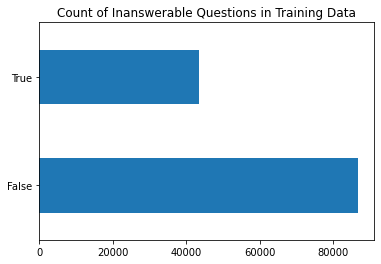

In [ ]:
train_df['is_impossible'].value_counts().plot(kind='barh',title='Count of Inanswerable Questions in Training Data')

In [ ]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11873 entries, 0 to 11872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             11873 non-null  object
 1   question       11873 non-null  object
 2   context        11873 non-null  object
 3   answers        11873 non-null  object
 4   is_impossible  11873 non-null  bool  
 5   context_id     11873 non-null  int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 475.5+ KB


In [ ]:
dev_df.groupby('is_impossible').count()

,id,question,context,answers,context_id
is_impossible,,,,,
False,5928,5928,5928,5928,5928
True,5945,5945,5945,5945,5945


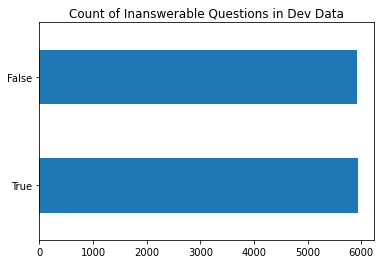

In [ ]:
dev_df['is_impossible'].value_counts().plot(kind='barh',title='Count of Inanswerable Questions in Dev Data')

## missing value
**No missing values other than the unanswerable ones in training dataset**

In [ ]:
train_df.isnull().sum()

index                0
question             0
context              0
is_impossible        0
text             43498
answer_start     43498
context_id           0
dtype: int64

In [ ]:
dev_df.isnull().sum()

id               0
question         0
context          0
answers          0
is_impossible    0
context_id       0
dtype: int64

## ! Paragraph-Context Count

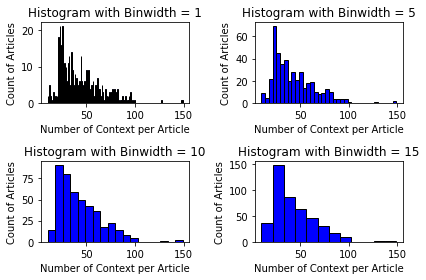

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(para_context, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth)
    ax.set_xlabel('Number of Context per Article')
    ax.set_ylabel('Count of Articles')

plt.tight_layout()
plt.show()

In [ ]:
para_context

[66,
 82,
 72,
 60,
 32,
 43,
 77,
 148,
 62,
 52,
 79,
 149,
 127,
 75,
 74,
 25,
 25,
 39,
 36,
 77,
 26,
 21,
 23,
 46,
 45,
 21,
 57,
 29,
 38,
 38,
 25,
 31,
 86,
 81,
 29,
 23,
 33,
 28,
 35,
 82,
 34,
 22,
 34,
 74,
 90,
 21,
 37,
 82,
 34,
 60,
 70,
 24,
 34,
 22,
 25,
 80,
 79,
 42,
 33,
 32,
 53,
 63,
 27,
 28,
 29,
 36,
 66,
 55,
 44,
 52,
 46,
 57,
 68,
 49,
 95,
 57,
 67,
 51,
 63,
 23,
 87,
 56,
 50,
 50,
 64,
 59,
 38,
 25,
 46,
 70,
 71,
 93,
 23,
 80,
 61,
 53,
 52,
 56,
 47,
 18,
 62,
 44,
 12,
 66,
 14,
 10,
 12,
 48,
 31,
 21,
 23,
 12,
 10,
 25,
 25,
 17,
 34,
 12,
 32,
 25,
 21,
 44,
 24,
 23,
 34,
 12,
 20,
 16,
 21,
 23,
 26,
 42,
 25,
 13,
 20,
 32,
 26,
 18,
 23,
 50,
 45,
 41,
 64,
 76,
 49,
 70,
 22,
 51,
 16,
 34,
 58,
 78,
 44,
 40,
 41,
 13,
 22,
 45,
 53,
 45,
 47,
 83,
 44,
 36,
 52,
 32,
 44,
 50,
 44,
 35,
 36,
 42,
 37,
 99,
 94,
 21,
 70,
 31,
 51,
 28,
 42,
 34,
 21,
 63,
 75,
 39,
 95,
 25,
 24,
 31,
 21,
 61,
 26,
 87,
 89,
 32,
 26,
 37,
 40,
 2

## Context-Question-Answer Count 
**Dev set has multiple answers for each question, while training set only has one answer for each.**

**For development set, min answer count = 1, max answer count = 6**

**Average number of question-answer pairs per context in training set = 7**

**Average number of questions per context in developmemt set = 10**

**Average number of answers per question in developmemt set = 3**


In [ ]:
dev_df.head()

,id,question,context,answers,is_impossible,context_id
0,56ddde6b9a695914005b9628,In what country is Normandy located?,The Normans (Norman: Nourmands; French: Norman...,"[{'text': 'France', 'answer_start': 159}, {'te...",False,0
1,56ddde6b9a695914005b9629,When were the Normans in Normandy?,The Normans (Norman: Nourmands; French: Norman...,"[{'text': '10th and 11th centuries', 'answer_s...",False,0
2,56ddde6b9a695914005b962a,From which countries did the Norse originate?,The Normans (Norman: Nourmands; French: Norman...,"[{'text': 'Denmark, Iceland and Norway', 'answ...",False,0
3,56ddde6b9a695914005b962b,Who was the Norse leader?,The Normans (Norman: Nourmands; French: Norman...,"[{'text': 'Rollo', 'answer_start': 308}, {'tex...",False,0
4,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,The Normans (Norman: Nourmands; French: Norman...,"[{'text': '10th century', 'answer_start': 671}...",False,0


In [ ]:
dev_df.loc[0,'answers']

[{'answer_start': 159, 'text': 'France'},
 {'answer_start': 159, 'text': 'France'},
 {'answer_start': 159, 'text': 'France'},
 {'answer_start': 159, 'text': 'France'}]

In [ ]:
dev_df.groupby('context_id').question.describe()

,count,unique,top,freq
context_id,,,,
0,9,9,When were the Normans in Normandy?,1
1,8,8,Who ruled the duchy of Normandy,1
2,4,4,When was the Latin version of the word Norman ...,1
3,7,7,What did the French promises to protect Rollo ...,1
4,3,3,Who upon arriving gave the original viking set...,1
...,...,...,...,...
1199,9,9,What is another word for centripetal force?,1
1200,9,9,A flow of water can not be considered an artif...,1
1201,8,8,What is sometimes impossible to model?,1


In [ ]:
answer_count = [len(a) for a in dev_df[dev_df.is_impossible==False].answers]
# y = [v * 5 for v in x]
# len(dev_df[dev_df.is_impossible==True].answers)
print("For development set, min answer count =", min(answer_count),"For development set, max answer count =", max(answer_count))

For development set, min answer count = 1 For development set, max answer count = 6


In [ ]:
print("Average number of question-answer pairs per context in training set = {:.0f}".format(train_df.groupby('context_id').question.count().mean()))
print("Average number of questions per context in developmemt set = {:.0f}".format(dev_df.groupby('context_id').question.count().mean()))
print("Average number of answers per question in developmemt set = {:.0f}".format(sum(answer_count)/len(answer_count)))

Average number of question-answer pairs per context in training set = 7
Average number of questions per context in developmemt set = 10
Average number of answers per question in developmemt set = 3


## Question Type

In [ ]:
q_type = ['where','when','what','which','who','why','how','does','did','has','was','is','are','were']

import time
start_time = time.time()

for i in q_type:
  print(i)
  # for a in range(len(train_df.question)):
  #   train_df[i]  = train_df.question[a].lower().find(i)+1
  train_df[i]  = [train_df.question[a].lower().find(i) for a in range(len(train_df.question))]

q_type_count = []
q_type_count.append([len(train_df[train_df[a]!=-1]) for a in q_type])
print("--- %s seconds ---" % (time.time() - start_time))

where
when
what
which
who
why
how
does
did
has
was
is
are
were
--- 16.921886920928955 seconds ---


In [ ]:
train_df[q_type]

,where,when,what,which,who,why,how,does,did,has,was,is,are,were
0,-1,0,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,-1
1,-1,34,0,-1,-1,-1,-1,-1,11,-1,43,-1,5,-1
2,-1,0,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,-1
3,-1,-1,3,-1,-1,-1,-1,-1,23,-1,-1,-1,-1,-1
4,-1,-1,-1,3,-1,-1,-1,-1,16,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130314,-1,-1,48,-1,-1,-1,-1,-1,-1,8,-1,-1,-1,-1
130315,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
130316,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,5,-1,-1
130317,-1,-1,60,-1,-1,-1,-1,15,-1,-1,-1,-1,-1,-1


**399 questions do not include any of above question type key word.**
**Typos are observed like 'which' and 'wat'**

In [ ]:
train_df[train_df[q_type].sum(axis=1)==-len(q_type)]

,index,question,context,is_impossible,text,answer_start,context_id,where,when,what,which,why,how,who,does,did,was,is,has,are,were
486,56bec29b3aeaaa14008c9380,Beyonce had singers in the background known by...,"In 2006, Beyoncé introduced her all-female tou...",False,The Mamas,216.0,41,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5299,56d1cda5e7d4791d009021ef,The laws of cause and effect can also be called?,Rebirth refers to a process whereby beings go ...,False,karma,738.0,787,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6639,56d5cba21c85041400946ddf,Do bigger dogs typically have longer or shorte...,"In 2013, a study found that mixed breeds live ...",False,shorter,195.0,1066,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7840,56dcd9ef9a695914005b944c,Whic country lies on Congo's western border?,The Republic of the Congo (French: République ...,False,Gabon,219.0,1248,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8973,56de1024cffd8e1900b4b5a7,Name a parasitic ectosymbiont.,"Ectosymbiosis, also referred to as exosymbiosi...",False,lice,271.0,1452,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122807,5731f0150fdd8d15006c6683,Name two smaller Lutheran church bodies.,"Today, Lutheranism is one of the largest branc...",False,International Lutheran Council and the Confess...,407.0,17928,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
122818,573209dfe17f3d14004225f7,Give two examples of spiritual gifts.,This branch of Protestantism is distinguished ...,False,speaking in tongues and divine healing,269.0,17931,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
125153,573260db0fdd8d15006c6a69,MBS and CDO derive their value from?,"As part of the housing and credit booms, the n...",False,mortgage payments and housing prices,190.0,18270,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
126341,5a4eab14af0d07001ae8cbbd,Wat continent stradled the south pole and exte...,During the Permian all the Earth's major land ...,True,NaN,NaN,18486,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


**Some questions belong to one type but may contain 2 question type key words**

In [ ]:
train_df.question[1]

'What areas did Beyonce compete in when she was growing up?'

**Plot count of each question type, as different question types have different level of difficulties.** 

In [ ]:
print(q_type)

['where', 'when', 'what', 'which', 'who', 'why', 'how', 'does', 'did', 'has', 'was', 'is', 'are', 'were']


In [ ]:
q_type_count[0]

[5610,
 9854,
 77847,
 8710,
 14972,
 1938,
 14501,
 7197,
 23564,
 3771,
 24820,
 47093,
 12311,
 6363]

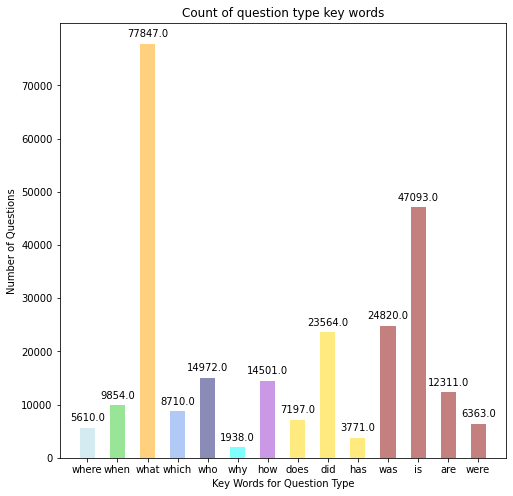

In [ ]:
import numpy as np                                                               
import matplotlib.pyplot as plt  

xs = np.arange(len(q_type)) 
ys = np.arange(0,80000,10000) 
width = .5

fig = plt.figure(figsize=[8,8])                                                               
ax = fig.gca()  #get current axes
ax.bar(xs, q_type_count[0], width, align='center', alpha = 0.5, \
       color=['lightblue', 'limegreen', 'orange', 'cornflowerblue',\
              'midnightblue','aqua','darkorchid','gold','gold','gold',\
              'darkred','darkred','darkred','darkred'])

#Remove the default x-axis tick numbers and  
#use tick numbers of your own choosing:
ax.set_xticks(xs)
#Replace the tick numbers with strings:
ax.set_xticklabels(q_type)
#Remove the default y-axis tick numbers and  
#use tick numbers of your own choosing:
ax.set_yticks(ys)
labels = q_type_count[0]

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
ax.set_xlabel('Key Words for Question Type')
ax.set_ylabel('Number of Questions')
plt.title('Count of question type key words')

plt.savefig('count of question type key words.png')

## Answer Length

In [ ]:
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP

split_text= [sub.split() for sub in train_df[train_df.is_impossible==False].text] 
split_text

[['in', 'the', 'late', '1990s'],
 ['singing', 'and', 'dancing'],
 ['2003'],
 ['Houston,', 'Texas'],
 ['late', '1990s']]

In [ ]:
train_df['split_text'] = ""

In [ ]:
mask = train_df.is_impossible==False
train_df.loc[mask, 'split_text'] = train_df.loc[mask, 'text'].apply(lambda x: x.split())

In [ ]:
train_df['ans_len'] = ""

In [ ]:
mask = train_df.is_impossible==False
train_df.loc[mask, 'ans_len'] = train_df.loc[mask, 'split_text'].apply(lambda x: len(x))
train_df.head()

,index,question,context,is_impossible,text,answer_start,context_id,where,when,what,which,why,how,who,does,did,was,is,has,are,were,split_text,ans_len
0,56be85543aeaaa14008c9063,When did Beyonce start becoming popular?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,in the late 1990s,269.0,0,-1,0,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,-1,"[in, the, late, 1990s]",4
1,56be85543aeaaa14008c9065,What areas did Beyonce compete in when she was...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,singing and dancing,207.0,0,-1,34,0,-1,-1,-1,-1,-1,11,43,-1,-1,5,-1,"[singing, and, dancing]",3
2,56be85543aeaaa14008c9066,When did Beyonce leave Destiny's Child and bec...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,2003,526.0,0,-1,0,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,-1,[2003],1
3,56bf6b0f3aeaaa14008c9601,In what city and state did Beyonce grow up?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,"Houston, Texas",166.0,0,-1,-1,3,-1,-1,-1,-1,-1,23,-1,-1,-1,-1,-1,"[Houston,, Texas]",2
4,56bf6b0f3aeaaa14008c9602,In which decade did Beyonce become famous?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,False,late 1990s,276.0,0,-1,-1,-1,3,-1,-1,-1,-1,16,-1,-1,-1,-1,-1,"[late, 1990s]",2


In [ ]:
# train_df['ans_len'].sum(axis = 0, skipna = True) 
print("Average Answer Length = {:.0f}".format(train_df[train_df.is_impossible==False]['ans_len'].mean()))

Average Answer Length = 3


In [ ]:
mask = train_df.is_impossible==False
train_df.loc[mask, 'isnumeric'] = train_df.loc[mask, 'text'].apply(lambda x: x.isnumeric())

In [ ]:
print("Number of questions with numeric answers are :",train_df[train_df.isnumeric==True].text.count())

Number of questions with numeric answers are : 6669


**Some answers have numerical meanings, but are written as numbers in english.**

In [ ]:
train_df[train_df.text=='two']

,index,question,context,is_impossible,text,answer_start,context_id,where,when,what,which,why,how,who,does,did,was,is,has,are,were,split_text,ans_len,isnumeric
599,56beca973aeaaa14008c9478,"How many Grammy awards did ""Crazy in Love"" win?","Her debut single, ""Crazy in Love"" was named VH...",False,two,225.0,52,-1,-1,-1,-1,-1,0,-1,-1,23,-1,-1,-1,-1,-1,[two],1,False
629,56becc903aeaaa14008c94a3,How many awards at the Broadcast Film Critics ...,"Beyoncé has won 20 Grammy Awards, both as a so...",False,two,949.0,54,-1,-1,-1,-1,-1,0,-1,-1,73,-1,-1,-1,-1,-1,[two],1,False
951,56cbedde6d243a140015edf5,How many piano concerts did Frédéric perform i...,"Back in Warsaw that year, Chopin heard Niccolò...",False,two,400.0,80,-1,-1,-1,-1,-1,0,-1,-1,24,-1,64,-1,-1,-1,[two],1,False
960,56d315d159d6e41400146224,How many public performances did Chopin do whe...,"Back in Warsaw that year, Chopin heard Niccolò...",False,two,400.0,80,43,-1,-1,-1,-1,0,-1,-1,29,-1,58,-1,-1,-1,[two],1,False
2131,56cd8dbf62d2951400fa66f6,How many weapons can be equipped by Link if pl...,The GameCube and Wii versions feature several ...,False,two,682.0,285,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,[two],1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128184,5733e44a4776f41900661441,How many principles approaches are there in ur...,Urban anthropology is concerned with issues of...,False,two,460.0,18708,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,31,-1,[two],1,False
128715,573431c5d058e614000b6ada,How many years did Davis spend in Fort Monroe?,President Abraham Lincoln visited General Gran...,False,two,1314.0,18799,-1,-1,-1,-1,-1,0,-1,-1,15,-1,22,-1,-1,-1,[two],1,False
128835,573446e7acc1501500babd82,How many United States presidents are interred...,Other historical points of interest include St...,False,two,537.0,18824,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,34,-1,[two],1,False
128883,573455eaacc1501500babdfb,How many monuments can be found in Byrd Park?,Two other major parks in the city along the ri...,False,two,258.0,18835,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,[two],1,False


## POS Tagging - In Progress

In [ ]:
# pip install stanfordnlp
!pip install stanza

     |████████████████████████████████| 286kB 5.7MB/s 


In [ ]:
# import stanfordnlp
# stanfordnlp.download('en')   # This downloads the English models for the neural pipeline
# nlp = stanfordnlp.Pipeline() # This sets up a default neural pipeline in English
import stanza
stanza.download('en') # download English model
nlp = stanza.Pipeline('en') # initialize English neural pipeline

2021-03-18 16:26:15 INFO: Downloading default packages for language: en (English)...
2021-03-18 16:27:36 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-03-18 16:27:36 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-03-18 16:27:36 INFO: Use device: cpu
2021-03-18 16:27:36 INFO: Loading: tokenize
2021-03-18 16:27:36 INFO: Loading: pos
2021-03-18 16:27:37 INFO: Loading: lemma
2021-03-18 16:27:37 INFO: Loading: depparse
2021-03-18 16:27:37 INFO: Loading: sentiment
2021-03-18 16:27:38 INFO: Loading: ner
2021-03-18 16:27:39 INFO: Done loading processors!


In [ ]:
train_df.loc[0,:]

index                                     56be85543aeaaa14008c9063
question                  When did Beyonce start becoming popular?
context          Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
is_impossible                                                False
text                                             in the late 1990s
                                       ...                        
are                                                             -1
were                                                            -1
split_text                                  [in, the, late, 1990s]
ans_len                                                          4
isnumeric                                                    False
Name: 0, Length: 24, dtype: object

In [ ]:
doc = nlp(train_df.text[0]) 
print(doc)

[
  [
    {
      "id": 1,
      "text": "in",
      "upos": "ADP",
      "xpos": "IN",
      "misc": "start_char=0|end_char=2"
    },
    {
      "id": 2,
      "text": "the",
      "upos": "DET",
      "xpos": "DT",
      "feats": "Definite=Def|PronType=Art",
      "misc": "start_char=3|end_char=6"
    },
    {
      "id": 3,
      "text": "late",
      "upos": "ADJ",
      "xpos": "JJ",
      "feats": "Degree=Pos",
      "misc": "start_char=7|end_char=11"
    },
    {
      "id": 4,
      "text": "1990s",
      "upos": "NOUN",
      "xpos": "NNS",
      "feats": "Number=Plur",
      "misc": "start_char=12|end_char=17"
    }
  ]
]


In [ ]:
print(doc.entities)

[]


universal POS (UPOS) tags, treebank-specific POS (XPOS) tags, and universal morphological features (UFeats).

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')
doc = nlp(train_df.text[0])
print(*[f'word: {word.text}\tupos: {word.upos}\txpos: {word.xpos}\tfeats: {word.feats if word.feats else "_"}' for sent in doc.sentences for word in sent.words], sep='\n')

2021-03-18 16:33:47 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-03-18 16:33:47 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2021-03-18 16:33:47 INFO: Use device: cpu
2021-03-18 16:33:47 INFO: Loading: tokenize
2021-03-18 16:33:47 INFO: Loading: pos
2021-03-18 16:33:47 INFO: Done loading processors!


word: in	upos: ADP	xpos: IN	feats: _
word: the	upos: DET	xpos: DT	feats: Definite=Def|PronType=Art
word: late	upos: ADJ	xpos: JJ	feats: Degree=Pos
word: 1990s	upos: NOUN	xpos: NNS	feats: Number=Plur


# try out bidaf 
- may use cs224 bidaf baseline py file directly instead

In [ ]:
import nltk

In [ ]:
#following replacement is suggested in the BidAF (Seo et al., 2016)
def tokenize(sequence):
    tokens = [token.replace("``", '"').replace("''", '"').lower() for token in nltk.word_tokenize(sequence)]
    return tokens

In [ ]:
def get_char_word_loc_mapping(context, context_tokens):
    """
    Return a mapping that maps from character locations to the corresponding token locations.
    If we're unable to complete the mapping e.g. because of special characters, we return None.

    Inputs:
      context: string (unicode)
      context_tokens: list of strings (unicode)

    Returns:
      mapping: dictionary from ints (character locations) to (token, token_idx) pairs
        Only ints corresponding to non-space character locations are in the keys
        e.g. if context = "hello world" and context_tokens = ["hello", "world"] then
        0,1,2,3,4 are mapped to ("hello", 0) and 6,7,8,9,10 are mapped to ("world", 1)
    """
    acc = '' # accumulator
    current_token_idx = 0 # current word loc
    mapping = dict()

    for char_idx, char in enumerate(context): # step through original characters
        if char != u' ' and char != u'\n': # if it's not a space:
            acc += char # add to accumulator
            context_token = str(context_tokens[current_token_idx]) # current word token
            if acc == context_token: # if the accumulator now matches the current word token
                syn_start = char_idx - len(acc) + 1 # char loc of the start of this word
                for char_loc in range(syn_start, char_idx+1):
                    mapping[char_loc] = (acc, current_token_idx) # add to mapping
                acc = '' # reset accumulator
                current_token_idx += 1

    if current_token_idx != len(context_tokens):
        return None
    else:
        return mapping